<a href="https://colab.research.google.com/github/GURUPRASAD120303/CIFAR-10-Dataset/blob/main/CIFAR_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
# Data augmentation to improve generalization
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [7]:
# Build the adjusted CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model using the augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=x_train.shape[0] // 64)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 57s 57ms/step - accuracy: 0.3192 - loss: 2.2070 - val_accuracy: 0.4779 - val_loss: 1.5661
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4844 - loss: 1.5396

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.4844 - loss: 1.5396 - val_accuracy: 0.4750 - val_loss: 1.5763
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.5222 - loss: 1.3370 - val_accuracy: 0.6250 - val_loss: 1.0618
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 1.1689 - val_accuracy: 0.6334 - val_loss: 1.0401
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.6054 - loss: 1.1058 - val_accuracy: 0.6283 - val_loss: 1.0682
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.7188 - loss: 0.8944 - val_accuracy: 0.6406 - val_loss: 1.0322
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.6617 - loss: 0.9659 - val_accuracy: 0.7170 - val_loss: 0.8248
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.8489 - val_accuracy: 0.7134 - val_loss: 0.8316
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.6859 - loss: 0.8909 - val_accuracy: 0

In [10]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8247 - loss: 0.5242
Test accuracy: 82.45%


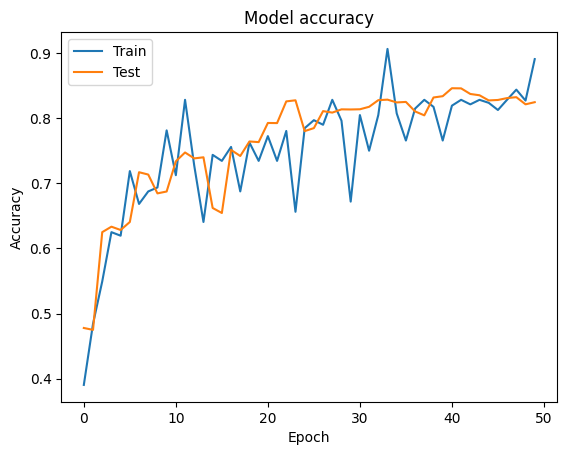

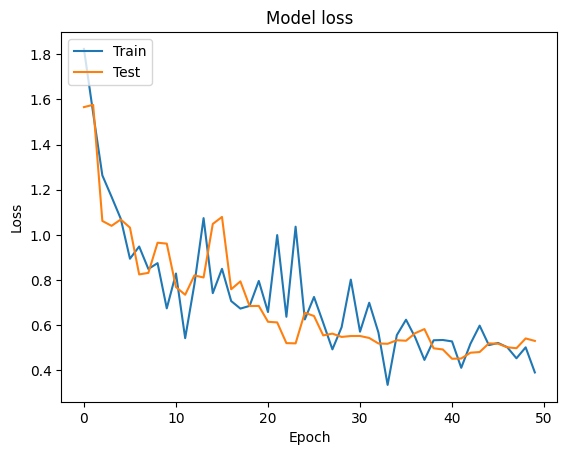

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [14]:
# After training the model
model.save('cifar10_cnn_model.h5')

In [15]:
import os
print(os.getcwd())  # Print the current working directory


/content


In [16]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('cifar10_cnn_model.h5')


In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to preprocess the input image
def preprocess_image(img_path):
    # Load the image with target size of (32, 32)
    img = image.load_img(img_path, target_size=(32, 32))
    # Convert the image to array
    img_array = image.img_to_array(img)
    # Normalize the image (same as training data)
    img_array = img_array / 255.0
    # Expand dimensions to match model input
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [20]:
# Path to your input image
img_path = '/content/pexels-photo-1543839.jpeg'  # Replace with your image path

# Preprocess the image
input_image = preprocess_image(img_path)

# Predict the class
predictions = model.predict(input_image)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print the predicted class
print(f'Predicted class: {class_names[predicted_class]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: horse
